## Car Price Prediction

This dataset includes used vehicles' specifications such as model, year, engine as well as their prices. We will estimate the prices of used cars with using these features. It will be Supervised Learning as the price feature is given. In addition, since our estimation is price value which is real-valued, we will have solved the Regression problem.


In our case first we will create a simple linear regression model. After that we will improve our model with using different algorithms.

***

### Downloading Dataset
First step is downloading the dataset. 

The dataset can be fetched with Kaggle CLI by using below command.

#### kaggle datasets download -d CooperUnion/cardataset

or you can also download the dataset from the Kaggle site with the link below:

https://www.kaggle.com/CooperUnion/cardataset

After downloading the dataset, we need to unzip the file to read the dataset.

Let's read the dataset:
***

### Reading the Data

To read and analyze the dataset we need to import some libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

To read csv files, common action is to use `read_csv` function of the pandas library. The `read_csv` function returns `pandas.core.frame.DataFrame` object. After reading csv file as `DataFrame` object, we need to assign it to a variable which is in this case the `df`.

In [6]:
df = pd.read_csv('data.csv')

With built-in `len` function of the Python, we find how many rows(records) there are?

In [5]:
len(df)

11914

Let's look at the first five rows of our DataFrame with `head()` function.

In [8]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Preprocessing the Data

At first glance at the dataset, it is noticed that the column names and their contents are not in the correct format, especially contents that may be categorical variables such as the `Driven_Wheels` column's content. 

First, we will normalize the column names by replacing all spaces with underscores and all letters with lowercase letters.

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

After the manipulation, there is now more convenient format for the column names.

In [12]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

> **Note**: *The columns wich are `object type` are assumed as `categorical data`. Beyond changing the form of categorical data, to increase our model's accuracy,  the categorical data needs to be preprocessed to be input to our model . We will work on this later.*


<p> Also, to uniform the content of the columns which are object type, we implement the same form changes to them: 

Our rule is, again, ___replace all spaces with underscore and lowercase all letters.___

</p>

To do that:

* select only columns with string values which are `object types`.

In [13]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

* make the appropriate changes to the content of the string columns according to the above rule.

In [17]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

Let's have a look at the first five rows again.

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


With these chanes, you will see that we will preprocess the categorical variables easily.

### Target Variable Analysis

<AxesSubplot:xlabel='msrp', ylabel='Count'>

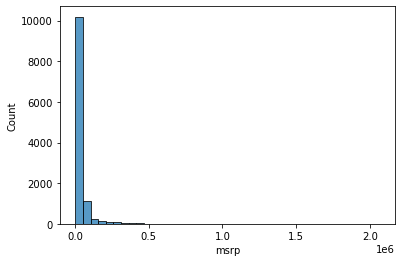

In [23]:
# The MSRP(Manufacture's suggested Retail Price) colums is our target variable, y, which is the value that we want to predict.
# First steps of explotary data analysis should always be to look at what the values of y look like. 
# We typically do this by checking the distribution of y: a visual description of what the possible values of y can be and 
# how often they occur. This type of visualization is called a histogram.
sns.histplot(df.msrp, bins=40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

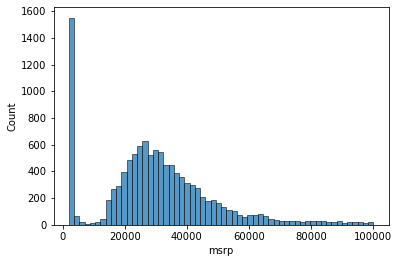

In [24]:
# We immediately notice that the distribution of prices has a very long tail. There are many cars with low prices on the 
# left side, but the number quickly drops, and there's a long tail of very few cars with high prices.
# We can have a closer look by zooming in a bit and looking at values below $100,00
sns.histplot(df.msrp[df.msrp < 100000])

We also notice a lot of cars that cost $1,000.
The long tail makes it quite difficult for us to see the distribution, but it has an even
stronger effect on a model: such distribution can greatly confuse the model, so it
won’t learn well enough. One way to solve this problem is **log transformation**. If we
apply the log function to the prices, it removes the undesired effect.

The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity,
but the logarithm of one is zero. If our values are all non-negative, by adding 1, we
make sure that the transformed values do not go below zero.
For our specific case, zero values are not an issue — all the prices we have start at
$1,000 — but it’s still a convention that we follow. NumPy has a function that performs
this transformation:

In [25]:
log_price = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

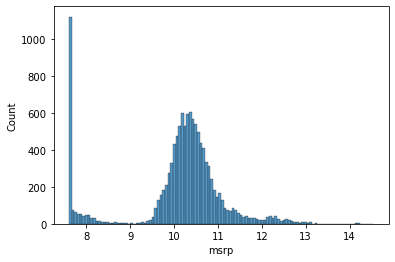

In [26]:
sns.histplot(log_price)

As we see, this transformation removes the long tail, and now the distribution resembles a bell-shaped curve. This distribution is not normal, of course, because of the
large peak in lower prices, but the model can deal with it more easily.

### Checking for Missing Values

Pandas has a convenient function that checks for missing values:

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

The first thing we see is that MSRP — our target variable — doesn’t have any missing
values. This result is good, because otherwise, such records won’t be useful to us: we
always need to know the target value of an observation to use it for training the model.

We need to deal with missing values later when we train the model, so we should
keep this problem in mind. For now, we don’t do anything else with these features and
proceed to the next step: setting up the validation framework so that we can train and
test machine learning models.

### Validation framework

As we learned previously, it’s important to set up the validation framework as early as
possible to make sure that the models we train are good and can generalize — that
is, that the model can be applied to new, unseen data. To do that, we put aside some
data and train the model only on one part. Then we use the held-out dataset — the
one we didn’t use for training — to make sure that the predictions of the model
make sense.

This step is important because we train the model by using 
optimization methods that fit the function g(X) to the data X. Sometimes these optimization methods pick up spurious patterns — patterns that appear to be real patterns to the model but in reality are random fluctuations. If we have a small training dataset in which all BMW cars cost only $10,000, for example, the model will think that this is true for all BMW cars in the world.
[
Bu adım önemlidir çünkü modeli kullanarak eğitiyoruz.
g(X) fonksiyonunu veri X'e uyduran optimizasyon yöntemleri. Bazen bu optimizasyon yöntemleri, modele gerçek kalıplar gibi görünen ancak gerçekte rastgele dalgalanmalar olan sahte kalıplar alır.
Örneğin, tüm BMW otomobillerinin yalnızca 10.000 dolara mal olduğu küçük bir eğitim veri setimiz varsa, model bunun dünyadaki tüm BMW otomobilleri için geçerli olduğunu düşünecektir.
]

To ensure that this doesn’t happen, we use validation. Because the validation dataset
is not used for training the model, the optimization method did not see this data.

When we apply the model to this data, it emulates the case of applying the model to new data that we’ve never seen. If the validation dataset has BMW cars with prices higher than `$10,000`, but our model will predict `$10,000`on them, we will notice that the model doesn’t perform well on these examples.

As we already know, we need to split the dataset into three parts: train, validation, and test.

Let’s split the DataFrame such that
* 20% of data goes to validation.
* 20% goes to test.
* The remaining 60% goes to train.

### Splitting Data into validation, test, and training sets

In [31]:
# Gets the number of rows in the DataFrame
n = len(df)
n

11914

In [30]:
# Calculates how many rows should go to train, validation, and test
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n_train

7150

In [34]:
# Fixes the random seed to make sure that the results are reproducible
np.random.seed(2)

In [36]:
# Creates a NumPy array with indices from 0 to (n–1), and shuffles it
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [35]:
# Uses the array with indices to get a shuffled DataFrame
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [45]:
# Splits the shuffled DataFrame into train(7150), validation(2382), and test(2382)
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

Now the DataFrame is split into three parts, and we can continue. Our initial analysis showed a long tail in the distribution of prices, and to remove its effect, we need to apply the log transformation. We can do that for each DataFrame separately:

In [46]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [47]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

To avoid accidentally using the target variable later, let’s remove it from the dataframes:

In [49]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

When the validation split is done, we can go to the next step: training a model.

### Machine learning for regression

After performing the initial data analysis, we are ready to train a model. The problem we are solving is a regression problem: the goal is to predict a number — the price of a car. For this project we will use the simplest regression model: linear regression.

### Linear regression

supervised machine learning model has the form

$y\approx g(X)$

Then, for this single observation, the previous formula looks like

$y_{i}\approx g(x_{i})$

If we have n features, our vector $x_{i}$ is n-dimensional, so it has n components:

$x_{i}=(x_{i1}, x_{i2},...,x_{in})$

Because it has n components, we can write the function **g** as a function with n parameters, which is the same as the previous formula:

$x_{i}=g(x_{i})=g(x_{i1}, x_{i2},...,x_{in})$

Let’s pick a few numerical features and ignore the rest for now. We can start with
horsepower, MPG in the city, and popularity:

**engine_hp**      453

**city_mpg**       11

**popularity**     86

Then let’s assign these features to $x_{i1}, x_{i2}, and x_{i3}$, respectively. This way, we get the feature
vector xi with three components:
$x_{i}=(x_{i1},x_{i2},x_{i3})=(453,11,86)$

In [51]:
#To make it easier to understand, we can translate this mathematical notation to Python.
def g(xi):
    # xi is a list with n elements
    # do something with xi
    # return the result
    pass

In this code, the variable $x_{i}$ is our vector $x_{i}$. Depending on implementation, $x_{i}$ could
be a list with n elements or a NumPy array of size n.
For the car described previously, $x_{i}$ is a list with three elements:

$x_{i}=[453, 11, 86]$

When we apply the function g to a vector $x_{i}$, it produces **y_pred** as the output, which
is the g’s prediction for $x_{i}$:

y_pred = $g(x_{i})$

If **g** is the linear regression model, it has the following form:

$g(x_{i})=g(x_{i1},x_{i2},...,x_{in}) = w_{0} + x_{i1} w_{1} + x_{i2} w_{2} + ... + x_{in} w_{n} $

The variables $w_{0}, w_{1}, w_{2},$ …, wn  are the parameters of the model:

* $w_{0}$ is the _bias_ term.
* $w_{1}, w_{2},...,w_{n}$ are the _weights_ for each feature $x_{i1},x_{i2},...,x_{in}$

To keep the formula shorter, let’s use sum notation:

$g(x_{i}) = g(x_{i1},x_{i2},...,x_{in}) = w_{0} + \sum \limits _{j=1} ^{n} X_{ij} w_{j} $

These weights are what the model learns when we train it. To better understand how
the model uses these weights, let’s consider the following values

$w_{0}$    -> 7.17    

$w_{1}$     -> 0.01        

$w_{2}$     -> 0.04 

$w_{3}$    -> 0.002

So if we want to translate this model to Python, it will look like this:

In [52]:
w0 = 7.17
# [w1 w2 w3 ]
w = [0.01, 0.04, 0.002]
n = 3

In [53]:
def linear_algebra(xi):
    result = w0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

We put all the feature weights inside a single list w — just like we did with xi previously.
All we need to do now is loop over these weights and multiply them by the corresponding
feature values.

Our example has three features, so n = 3, and we have

$g(x_{i}) = g(x_{i1},x_{i2},x_{i3}) = w_{0} + \sum \limits _{j=1} ^{3} X_{ij} w_{j} = w_{0} + x_{i1} w_{1} + x_{i2} w_{2} + x_{i3} w_{3} $

This is exactly what we have in the code

result = w0 + xi[0] * w[0] + xi[1] * w[1] + xi[2] * w[2]

Now let’s see what happens when we apply the model to our observation xi and
replace the weights with their values:

$g(x_{i}) = 7.17 + 453 * 0.01 + 11 * 0.04 + 86 * 0.002 = 12.31$

The prediction we get for this observation is 12.31. Remember that during preprocessing,
we applied the logarithmic transformation to our target variable y. This is why the
model we trained on this data also predicts the logarithm of the price. To undo the transformation,
we need to take the exponent of the logarithm. In our case, when we do
it, the prediction becomes $603,000:

exp(12.31 + 1) = 603,000

The bias term (7.17) is the value we would predict if we didn’t know anything about
the car; it serves as a baseline.

We do know something about the car, however: horsepower, MPG in the city, and
popularity. These features are the xi1, xi2, and xi3 features, each of which tells us something
about the car. We use this information to adjust the baseline.

Let’s consider the first feature: horsepower. The weight for this feature is 0.01,
which means that for each extra unit of horsepower, we adjust the baseline by adding
0.01. Because we have 453 horses in the engine, we add 4.53 to the baseline: 453
horses · 0.01 = 4.53.

The same happens with MPG. Each additional mile per gallon increases the price
by 0.04, so we add 0.44: 11 MPG · 0.04 = 0.44.

Finally, we take popularity into account. In our example, each mention in the Twitter
stream results in a 0.002 increase. In total, popularity contributes 0.172 to the final
prediction.

This is exactly why we get 12.31 when we combine everything

$g(x_{i}) = 7.17 + 453 * 0.01 + 11 * 0.04 + 86 * 0.002 = 12.31$

       Bias   Horsepower  MPG     Popularity
       
              4.53        0.44    0.172

Because we now think of both features and weights as vectors $x_{i}$ and $w$, respectively, we
can replace the sum of the elements of these vectors with a dot product between
them:

$x_{i} ^{T} w = \sum \limits _{j=1} ^{n} x_{ij} w_{j} = x_{i1} w_{1} + x_{i2} w_{2} + x_{i3} w_{3} $

The dot product is a way of multiplying two vectors: we multiply corresponding elements
of the vectors and then sum the results.

The translation of the formula for dot product to the code is straightforward:

In [58]:
def dot(xi, w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

Using the new notation, we can rewrite the entire equation for linear regression as

$g(x_{i})=w_{0} + x_{i} ^{T} w$

where

* $w_{0}$ is the bias term.
* $w$ is the n-dimensional vector of weights.

Now we can use the new dot function, so the linear regression function in Python
becomes very short:

In [59]:
def linear_regression(xi):
    return w0 + dot(xi, w)

Alternatively, if $x_{i}$ and $w$ are NumPy arrays, we can use the built-in dot method for
multiplication:

In [ ]:
def linear_regression(xi):
    return w0 + xi.dot(w)

To make it even shorter, we can combine $w_{0}$ and $w$ into one (n+1)-dimensional vector
by prepending $w_{0}$ to $w$ right in front of $w_{1}$:

$w=(w_{0},w_{1},w_{2},...,w_{n})$

In Python, this is very easy to do. If we already have the old weights in a list $w$, all we
need to do is the following:

In [60]:
w = [w0] + w

Remember that the plus operator in Python concatenates lists, so [1] + [2, 3, 4] will
create a new list with four elements: [1, 2, 3, 4]. In our case, $w$ is already a list, so we
create a new $w$ with one extra element at the beginning: $w_{0}$.

Because now $w$ becomes a (n+1)-dimensional vector, we also need to adjust the feature
vector $x_{i}$ so that the dot product between them still works. We can do this easily by
adding a dummy feature $x_{i0}$, which always takes the value 1. Then we prepend this
new dummy feature to $x_{i}$ right before $x_{i1}$:

$x_{i}=(x_{i0},x_{i1},x_{i2},...x_{in})=(1,x_{i1},x_{i2},...,x_{in})$

Or, in code:

In [ ]:
xi = [1] + xi

With these modifications, we can express the model as the dot product between
the new $x_{i}$ and the new $w$:

$g(x_{i})=x_{i} ^{T} w$

The translation to the code is simple:

In [62]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w = [w0] + w

In [63]:
def linear_regrssion(xi):
    xi = [1] + xi
    return dot(xi, w)

We are ready to consider the bigger picture again and talk about the matrix form.
There are many observations and $x_{i}$ is one of them. Thus, we have m feature vectors $x_{1},
x_{2}, …, x_{i}, …, x_{m},$ and each of these vectors consists of n+1 features:


$x_{1}=(1, x_{11},x_{12},..,x_{1n})$

$x_{2}=(1, x_{21},x_{22},..,x_{2n})$

           ...

$x_{i}=(1, x_{i1},x_{i2},..,x_{in})$

           ...

$x_{m}=(1, x_{m1},x_{m2},..,x_{mn})$

We can put these vectors together as rows of a matrix.

Let’s see how it looks in code. We can take a few rows from the training dataset, such
as the first, second, and tenth:

In [64]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

Now let’s put the rows together in another list:

In [66]:
X = x1 + x2 + x10

List X now contains three lists. We can think of it as a 3x4 matrix — a matrix with three
rows and four columns:

In [70]:
X = [[1, 148, 24, 1385],
    [1, 132, 25, 2031],
    [1, 453, 11, 86]]

Each column of this matrix is a feature:

* The first column is a dummy feature with “1.”

* The second column is the engine horsepower.

* The third — MPG in the city.

* And the last one — popularity, or the number of mentions in a Twitter stream.

We already learned that to make a prediction for a single feature vector, we need to
calculate the dot product between this feature vector and the weights vector. Now we
have a matrix $X$, which in Python is a list of feature vectors. To make predictions for all
the rows of the matrix, we can simply iterate over all rows of $X$ and compute the dot
product:

In [73]:
predictions = []

for xi in X:
    pred = dot(xi, w)
    predictions.append(pred)

In linear algebra, this is the matrix-vector multiplication: we multiply the matrix $X$ by
the vector $w$. The formula for linear regression becomes

$g(X)=w_{0}+ Xw$

The result is an array with predictions for each row of X.

The translation to NumPy becomes straightforward:

predictions=X.dot(w)

### Training linear regression model

The weight vector $w$ can be computed with the following formula:

$w=(X^{T}X)^{-1}X{^T}y$

Let's translate to NumPy:
* $X{^T}$ is the transpose of $X$. In NumPy, it's $X.T$
* $X{^T}X$ is a matrix-matrix multiplication, which we can do with the $dot$ method from NumPy: $X.T.dot(X)$
* $X{^-1}$ is the inverse of $X$. We can $np.linalg.inv$ function to calculate the inverse.

So the formula above translates directly to:

$inv(X.T.dot(X)).dot(X.T).dot(y)$

To implement the normal equation, we need to do the following:

* Create a function that takes in a matrix $X$ with features and a vector $y$ with the target.
* Add a dummy column(the feature that is always set to 1) to the matrix $X$.
* Train the model: compute the weights $w$ by using the normal equation.
* Split this $w$ into the _bias_ $w_{0}$ and the rest of the weights, and return them.

The last step -- splitting $w$ into the _bias_ term and the rest -- is optional and mostly for convenience; otherwise, we need to add the dummy column every time we want to make predictions instead of doing it once during training.

Let's implement it.

In [79]:
def train_linear_regression(X, y):
    ## adding the dummy column##
    
    # Creates an array that contains only ones
    ones = np.ones(X.shape[0])
    # Adds the array of 1's as the first column of X
    X = np.column_stack([ones, X])
    
    ## normal equation formula##
    
    # Computes X.T.X
    XTX = X.T.dot(X)
    # Computes the inverse of X.T.X
    XTX_inv = np.linalg.inv(XTX)
    # Computes the rest of the normal equation
    w = XTX_inv.dot(X.T).dot(y)
    
    # Splits the weights vector into the bias and the rest of the weights
    return w[0], w[1:]

If weights are split into the bias term and the rest, the linear regression formula for making predictions changes slightly:

$g(X)=w_{0} + Xw$

This is still very easy to translate to NumPy:

In [ ]:
y_pred = w[0] + X.dot(w)

Let's use it for our project!

In [76]:
ones = np.array([1, 1])
ones

array([1, 1])

In [77]:
X = np.array([[2,3], [4,5]])
X

array([[2, 3],
       [4, 5]])

In [78]:
np.column_stack([ones, X])

array([[1, 2, 3],
       [1, 4, 5]])

The function $column__stack$ takes a list of NumPy arrays and stacks them in columns. In our case, the function appends the array with ones as the first column of the matrix.

We now have a function for training a linear regression model at our disposal, so let's use it to build a simple baseline solution.

### Baseline solution

To be able to use it, we need to have some data: a matrix $X$ and a vector with the target variable $y$. We have already prepared the $y$, but we still don't have the $X$: what we have right noe is a data frame, not a matrix. So we need to extract some features from our dataset to create this matrix X.

In the previous example, we used only three features. This time, we include a couple more features and use the following columns:
* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg
* popularity

Let's select the features from the data frame and write them to a new variable, df_num:

In [80]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

The dataset has missing values,so we need to do something because the linear regression model cannot deal with missing values automatically.

The simplest possible approach is to fill the missing values with zeros. We can use the $fillna$ method from Pandas:

In [82]:
df_num = df_num.fillna(0)

This method may not be the best way to deal with missing values, but often, it's good enough. If we set the missing feature value to zero, the respective feature is simply ignored.

**NOTE:** An alternative option is to replace the missing values with the average values. For some variables, for example, the number of cylinders, the value of zero doesn't make much sense: a car cannot have zero cylinders. However, this will make our code more complex and won't have a significant impact on the results. That's why we follow a simpler approach and replace missing values with zeros.

In our case, we have five features, so the formula is:

$g(X_{i})=w_{0} + x_{i1}w_{1} + x_{i2}w_{2} + x_{i3}w_{3} + x_{i4}w_{4} + x_{i5}w_{5}$

Now we need to convert this DataFrame to a NumPy array. The easiest way to do is to use its $values$ property:

In [84]:
X_train = df_num.values

X_train is a matrix -- a two-dimensional NumPy array. We can use a input to our linear_regression function.

In [85]:
w_0, w = train_linear_regression(X_train, y_train) 

We have just trained the first model! Now we can apply it to the training data to see how well it predicts:

In [86]:
y_pred = w_0 + X_train.dot(w)

To see how good the predictions are, we can use $histplot$ -- a function from $Seaborn$ for plotting histograms that we used previously -- to plot the predicted values and compare them with the actual prices:

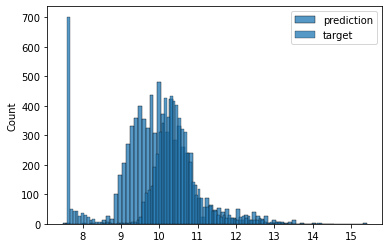

In [87]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

We can see from the plot that the distribution of values we predicted looks quite different from the actual values. This result may indicate that the model is not powerful enough to capture the distribution of the target variable. This shouldn't be a suprise to us: the model we used is quite basic and includes only five very simple features.

### RMSE: Evaluating model quality

Looking at plots and comparing the distributions of the actual target variable with the predictions is a good way to evaluate quality, but we cannot do this every time we change something in the model. Instead, we need to use a metric that quantifies the quality of the model. We can use many metrics to evaluate how well a regression model behaves.
The most commonly used one is __root mean squared error__ --- RMSE for short.

RMSE tells us how large the errors are that our model makes. Its computed with the following formula:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

Let's try to understand the equition:

$(g(x_{i})-y_{i})^{2}$

This is the difference between the prediction we make for the observation and actual target value for that observation. Then we use square of the difference, which gives a lot more weight to larger differences.

For example:
* If we predict 9.5, and actual value is 9.6, the difference is 0.1, so its aquare is 0.01, which is quite small. But if we predict 7.3, and the actual value is 10.3, the difference is 3, and the square of the difference is 9. This is SE part of RMSE.

Next we have sum: $\sum \limits _{i=1} ^{m}$
This summation goes over all $m$ observations and puts all the squared errors together into a single number.

If we divide this sum by $m$, we get the mean squared error: $\frac{1}{m}$

Finally, we take the square root of that:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

$\hat{Y} = g(x_{i}) \hat{\beta}_{0} + \sum \limits _{j=1} ^{3} X_{ij} w_{j} = w_{0} + x_{i1} w_{1} + x_{i2} w_{2} + x_{i3} w_{3} $